### Projeto Prático - *Reconhecimento de Dígitos*

Alunos:
- Júlia Moraes da Silva 20230014434
- Luiz Eduardo de Almeida Siqueira Silva 20230014210

#### Importando as bibliotecas

In [236]:
import numpy as np
import random
from random import sample
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#### Explicação do Dataset

Cada imagem é composta por 28 linhas e 28 colunas em um total de 784 pixels. Os dados de entrada (treino) possuem 785 colunas, a primeira coluna é chamada "label", identificando o dígito desenhado pelo usuário. O resto das colunas contém os valores de pixels da imagem associada. Cada coluna de pixel nos dados de treino, é nomeada "pixelx" onde x é um inteiro no intervalo [0,783]. Para localizar este pixel na imagem, x foi decomposto como x = i * 28 + j. Onde i e j são inteiros no intervalo [0,27]. 

Vamos inicar importando os csv.

#### Redução da dimensão das amostras 

In [3]:
treino = pd.read_csv('train.csv', sep=';')  
matriz_treino = treino.values


teste = pd.read_csv('test.csv', sep=';')
matriz_teste = teste.values

In [4]:

def acessar_imagem(dataset, indice):
    """
    Acessa uma imagem do dataset e retorna a imagem 28x28 e o label.
    
    Args:
        dataset (numpy.ndarray): O dataset contendo imagens e labels.
        indice (int): O índice da imagem a ser acessada.
    Returns:
        tuple: Uma tupla contendo a imagem 28x28 e o label (ou None se não houver label).
    """

    # Verificar se temos dados válidos
    if dataset.shape[1] >= 785:
    # Dataset com label
        label = dataset[indice, 0] 
        pixels = dataset[indice, 1:785] 
    
        #  Só faz reshape se temos 784 pixels
        if len(pixels) == 784:
            imagem_28x28 = pixels.reshape(28, 28)
        else:
            print(f"ERRO: {len(pixels)} pixels encontrados, esperado 784")
        
    elif dataset.shape[1] == 784:
    # Dataset só com pixels
        pixels = dataset[indice]
        label = None
    
    #print(f"Dataset label : {label}")
    #print(f"Pixels: {len(pixels)}")
    
    imagem_28x28 = pixels.reshape(28, 28)

    return imagem_28x28, label
    

In [5]:
def visualizar_imagem(imagem_28x28, label):
    """
    Visualiza uma imagem 28x28
    
    Parâmetros:
    - imagem_28x28: matriz 28x28 com os pixels da imagem
    - label: o dígito da imagem 
    
    
    Retorna:
    - imagem plotada com título indicando o dígito (ou 'Imagem do Dataset' se label for None)
    """
    
    if imagem_28x28.shape != (28, 28):
        print(f"ERRO: Formato incorreto {imagem_28x28.shape}. Esperado (28, 28)")
        return None
    
    # Criar título da imagem
    if label is not None:
        titulo = f'Dígito: {label}'
    else:
        titulo = 'Imagem do Dataset'
    
    # Plotar a imagem
    plt.figure(figsize=(6, 6))
    plt.imshow(imagem_28x28, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
    

In [6]:
def intensidade_imagem(imagem):
    """
    Calcula a intensidade de preto de uma imagem.

    l =  ∑ (i=0 até 783)(pixel_i)/255
    
    Parâmetros:
    - imagem: matriz 28x28 com os valores dos pixels
    
    Retorna:
    - intensidade: aproximação da quantidade de pixels pretos na imagem 
    """

    intensidade =  np.sum(imagem)/255
     
    return intensidade
    

In [7]:
def simetria_imagem(imagem):
    """
    Calcula a simetria de uma imagem.

    s_v =  ∑ (i=0 até 27)(j=0 até 13) || pixel_ij - pixel_i(27-j) ||/255

    s_h = ∑ (i=0 até 13)(j=0 até 27) || pixel_ij - pixel_(27-i)j ||/255

    s = s_v + s_h

    Parâmetros:
    - imagem: matriz 28x28 com os valores dos pixels
    
    Retorna:
    - simetria: medida de simetria da imagem 
    """
    s_v = 0
    s_h = 0
    simetria = 0
    for i in range(28):
        for j in range(14):
            s_v += np.abs(imagem[i, j] - imagem[i, 27 - j])

    s_v /= 255

    for i in range(14):
        for j in range(28):
            s_h += np.abs(imagem[i, j] - imagem[27 - i, j])

    s_h /= 255

    simetria = s_v + s_h
    
    return simetria


In [8]:
def informs (dataset, indice):
    """
    Função para extrair informações de uma imagem em um conjunto de dados.
    
    """
    info = []
    
    imagem, label = acessar_imagem(dataset, indice)
    info.append(label)
    intensidade = intensidade_imagem(imagem)
    info.append(intensidade)
    simetria = simetria_imagem(imagem)
    info.append(simetria)
        
    return info


Criando os arquivos com a redução das dimensões das amostras. O primeiro elemento será o label, seguido pela intensidade e pela simetria. Fizemos isso tanto para treino como para teste.

In [ ]:
"""for i in range(len(matriz_treino)):
    dados = informs(matriz_treino, i)
    with open("train_redu.csv", mode="a", newline="", encoding="utf-8") as arquivo:
        escritor = csv.writer(arquivo, delimiter=";")  # separador ;
        escritor.writerow(dados)"""

In [ ]:
"""for i in range(len(matriz_teste)):
    dados = informs(matriz_teste, i)
    with open("test_redu.csv", mode="a", newline="", encoding="utf-8") as arquivo:
        escritor = csv.writer(arquivo, delimiter=";")  # separador ;
        escritor.writerow(dados)"""

#### Classificação dos dígitos 1 x 5 

Separando em treino e em teste apenas as imagens com 1 e 5.

In [242]:

# Carregar os dados (ajuste o caminho do arquivo)
df_train_redu = pd.read_csv('train_redu.csv', sep=';', header=None, 
                 names=['label', 'intensidade', 'simetria'])

scaler = StandardScaler()
df_train_redu[['intensidade', 'simetria']] = scaler.fit_transform(df_train_redu[['intensidade', 'simetria']])

# Filtrar apenas as linhas com label 1 ou 5
df_train_1x5 = df_train_redu[df_train_redu['label'].isin([1, 5])]

df_train_1x5.shape 

df_train_1x5

label  intensidade  simetria
425       1    -1.690784 -1.576971
426       1    -1.156351 -1.016226
427       1    -1.554927 -1.190315
428       1    -0.818232 -1.434225
429       1    -1.449507 -0.969989
...     ...          ...       ...
2181      5     0.460644  0.979739
2182      5     0.720459  0.299522
2183      5     0.638420  0.945294
2184      5     0.235554  0.910228
2185      5     0.301407  1.275473

[1184 rows x 3 columns]

In [243]:
# Carregar os dados (ajuste o caminho do arquivo)
df_test_redu = pd.read_csv('test_redu.csv', sep=';', header=None, 
                 names=['label', 'intensidade', 'simetria'])

scaler = StandardScaler()
df_test_redu[['intensidade', 'simetria']] = scaler.fit_transform(df_test_redu[['intensidade', 'simetria']])


# Filtrar apenas as linhas com label 1 ou 5
df_test_1x5 = df_test_redu[df_test_redu['label'].isin([1, 5])]

df_test_1x5.shape

df_test_1x5

label  intensidade  simetria
218       1    -1.476110 -1.499809
219       1    -1.474858 -0.965141
220       1    -1.717051 -1.451427
221       1    -1.507271 -1.087174
222       1    -1.257982 -1.455741
...     ...          ...       ...
1110      5     0.101835  1.175075
1111      5     0.184050  0.829620
1112      5     0.067057  0.495568
1113      5     0.483557  0.722687
1114      5     0.865141  0.540868

[583 rows x 3 columns]

In [248]:
train_1 = df_train_1x5[df_train_1x5['label'] == 1]
train_5 = df_train_1x5[df_train_1x5['label'] == 5]

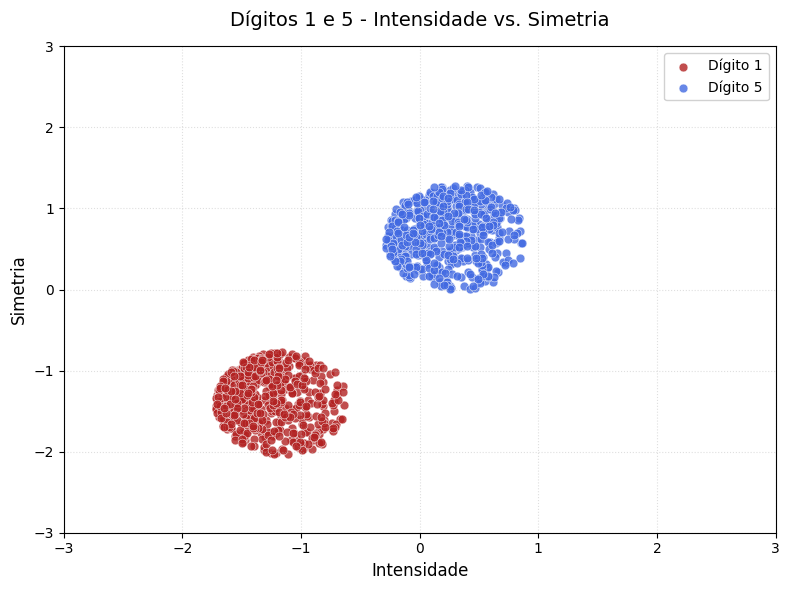

In [251]:
plt.figure(figsize=(8, 6)) 

plt.scatter(train_1['intensidade'], train_1['simetria'], 
           c='firebrick', s=40, edgecolor='white', linewidth=0.4, 
           label='Dígito 1', alpha=0.8)

plt.scatter(train_5['intensidade'], train_5['simetria'], 
           c='royalblue', s=40, edgecolor='white', linewidth=0.4, 
           label='Dígito 5', alpha=0.8)


plt.xlabel('Intensidade', fontsize=12)
plt.ylabel('Simetria', fontsize=12)
plt.title('Dígitos 1 e 5 - Intensidade vs. Simetria', pad=15, fontsize=14)


plt.legend(frameon=True, framealpha=0.9, facecolor='white')
plt.grid(True, linestyle=':', alpha=0.4)

# Ajuste automático dos limites
plt.xlim(-3, 3) 
plt.ylim(-3, 3)  

plt.tight_layout()  
plt.show()

In [253]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_train = []

for i in range(len(df_train_1x5)):
    intensidade = float(df_train_1x5.iloc[i]['intensidade'])
    simetria = float(df_train_1x5.iloc[i]['simetria'])
    X_train.append((intensidade, simetria))

# Construção do vetor y onde y = +1 para label = 1 e y = -1 para label = 5
y_train = []

for i in range(len(df_train_1x5)):
    if df_train_1x5.iloc[i]['label'] == 1:
        y_train.append(1)
    else:
        y_train.append(-1)



##### Percepton

In [254]:

class Perceptron:
    def __init__(self, max_iter=200000):
        self.w = None  # Vetor de pesos (será inicializado no fit)
        self.max_iter = max_iter
    
    def fit(self, X, y):
        """
        Treinamento do perceptron
        """
        # Adiciona termo de bias e inicializa pesos
        X_bias = np.insert(X, 0, 1, axis=1)
        self.w = np.zeros(X_bias.shape[1])
        
        # Algoritmo PLA
        lista_pci = self._pontos_classificados_incorretamente(X_bias, y)
        
        iteracao = 0
        while len(lista_pci) > 0 and iteracao < self.max_iter:
            # Escolhe ponto aleatório
            x_i, y_i = lista_pci[np.random.randint(len(lista_pci))]
            
            # Atualiza pesos
            self.w += y_i * x_i
            
            # Atualiza lista de pontos incorretos
            lista_pci = self._pontos_classificados_incorretamente(X_bias, y)
            
            iteracao += 1
        
        if iteracao == self.max_iter:
            print(f"Atenção: atingiu o número máximo de iterações ({self.max_iter}) sem convergir.")
    
    def predict(self, X):
        X_bias = np.insert(X, 0, 1, axis=1)
        return np.sign(X_bias @ self.w)
    
    def _pontos_classificados_incorretamente(self, X_bias, y):
        """
        Retorna lista de pontos mal classificados
        """
        return [(x_i, y_i) for x_i, y_i in zip(X_bias, y) 
                if np.sign(self.w @ x_i) != y_i]
    

In [281]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
print("Pesos finais:", perceptron.w)


Pesos finais: [ 0.         -0.93508458 -1.33902242]


##### Regressão Linear

In [256]:
class RegressaoLinear:
    def __init__(self):
        self.w = None

    def fit (self, X, y):
        """ 
        Calcula a pseudo inversa
        X ja deve conter a coluna de bias (1) na primeira coluna

        """
       
        # tranformando de lista pra array numpy
        X = np.array(X)
        y = np.array(y)

        #se faltar a coluna bias adiciona 
        if not np.all(X[:, 0] == 1):
            X = np.c_[np.ones((X.shape[0], 1)), X]

        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict (self, X):

        X = np.array(X)
        # Se faltar a coluna de bias adiciona
        if X.shape[1] + 1 == self.w.shape[0]:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        
        return np.sign(X @ self.w)


In [257]:
regressao_linear = RegressaoLinear()
regressao_linear.fit(X_train, y_train)
print(regressao_linear.w)

[-0.45412103 -0.53162854 -0.53370545]


##### Regressão Logística

In [288]:
class RegressaoLogistica:
    def __init__(self, eta=0.01, tmax=5000, bs=1000000):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = bs
        self.w = None

    def fit(self, _X, _y):
        X = np.array(_X)
        y = np.array(_y)

        # adiciona coluna de 1 (bias)
        X = np.c_[np.ones((X.shape[0], 1)), X]

        N, d = X.shape
        self.w = np.zeros(d)

        for t in range(self.tmax):
            expoente = np.dot(X, self.w)   # w^T * x_n
            num = X * y[:, np.newaxis]     
            den = 1 + np.exp(y * expoente)

            gradiente = - (1/N) * np.sum(num / den[:, np.newaxis], axis=0)

            if np.linalg.norm(gradiente) == 0:
                break

            self.w = self.w - self.eta * gradiente

    def predict_prob(self, _X):
        X = np.array(_X)
        # adiciona bias
        X = np.c_[np.ones((X.shape[0], 1)), X]

        prod_esc = np.dot(X, self.w)
        return 1 / (1 + np.exp(-prod_esc))

    def predict(self, _X):
        X = np.array(_X)
        # adiciona bias
        X = np.c_[np.ones((X.shape[0], 1)), X]

        prod_esc = np.dot(X, self.w)
        return np.sign(prod_esc)

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        # atenção: agora self.w[0] é o bias
        return (-self.w[0] + shift - self.w[1]*regressionX) / self.w[2]

In [289]:
logistic_model = RegressaoLogistica()
logistic_model.fit(X_train, y_train)
print(logistic_model.getW())

[-1.36539194 -1.82531414 -2.83341668]


#### Plot das Fronteiras

In [299]:
test_1 = df_test_1x5[df_test_1x5['label'] == 1]
test_5 = df_test_1x5[df_test_1x5['label'] == 5]

In [298]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_test = []

for i in range(len(df_test_1x5)):
    intensidade = float(df_test_1x5.iloc[i]['intensidade'])
    simetria = float(df_test_1x5.iloc[i]['simetria'])
    X_test.append((intensidade, simetria))




# Construção do vetor y onde y = +1 para label = 1 e y = -1 para label = 5
y_test = []

for i in range(len(df_test_1x5)):
    if df_test_1x5.iloc[i]['label'] == 1:
        y_test.append(1)
    else:
        y_test.append(-1)


In [301]:
# Testando no conjunto de teste 1x5
y_pred_perceptron = perceptron.predict(X_test)
y_pred_rl = regressao_linear.predict(X_test)
y_pred_rlog = logistic_model.predict(X_test)

In [433]:
def plot_fronteira(X,data_1, data_5, w1, w2= None, w3=None, title='Classificação', cor1='k--', cor2='g--', cor3='b--'):
    """
    Plota a fronteira de decisão de um ou dois classificadores lineares.
    
    X_train : array 2D com features (sem coluna de bias)
    train_1, train_5 : DataFrames com as features 'intensidade' e 'simetria'
    w1 : vetor de pesos do primeiro classificador [w0, w1, w2]
    w2 : (opcional)
    w2 : (opcional) vetor de pesos do segundo classificador
    title : título do gráfico
    cor1 : cor da primeira linha
    cor2 : cor da segunda linha (se w2 for fornecido)
    """

    # Adiciona coluna de bias
    X_bias = np.insert(np.array(X_train, dtype=float), 0, 1, axis=1)
    
    # Valores mínimos e máximos do eixo X
    x_vals = np.linspace(-3, 3, 100)

    # Função interna para calcular y da reta
    def calcula_y(w):
        w0, w1_coef, w2_coef = w
        return (-w0 - w1_coef * x_vals) / w2_coef

    plt.figure(figsize=(8, 6))

    # Pontos das classes
    plt.scatter(train_1['intensidade'], train_1['simetria'], 
                c="#3A37FC", s=80, edgecolor='white', linewidth=0.5, 
                label='Dígito 1', alpha=0.8)
    plt.scatter(train_5['intensidade'], train_5['simetria'], 
                c="#E92416", s=80, edgecolor='white', linewidth=0.5, 
                label='Dígito 5', alpha=0.8)

    # Linha do primeiro classificador
    y_vals1 = calcula_y(w1)
    plt.plot(x_vals, y_vals1, cor1, linewidth=2, label='Fronteira 1')

    # Linha do segundo classificador, se fornecido
    if w2 is not None:
        y_vals2 = calcula_y(w2)
        plt.plot(x_vals, y_vals2, cor2, linewidth=2, label='Fronteira 2')

    if w3 is not None:
        y_vals3 = calcula_y(w3)
        plt.plot(x_vals, y_vals3, cor3, linewidth=2, label='Fronteira 3')

    

    plt.xlabel('Intensidade', fontsize=12)
    plt.ylabel('Simetria', fontsize=12)
    plt.title(title, pad=15, fontsize=14)
    plt.legend(frameon=True, framealpha=0.9, facecolor='white')
    plt.grid(True)

  
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)

    plt.tight_layout()
    plt.show()

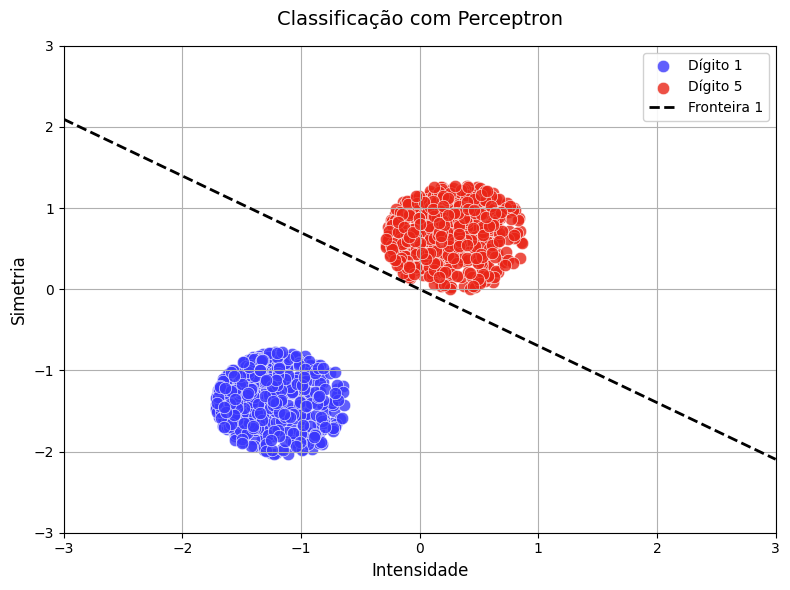

In [434]:
plot_fronteira(X_test, test_1, test_5, perceptron.w, title='Classificação com Perceptron', cor1='k--')

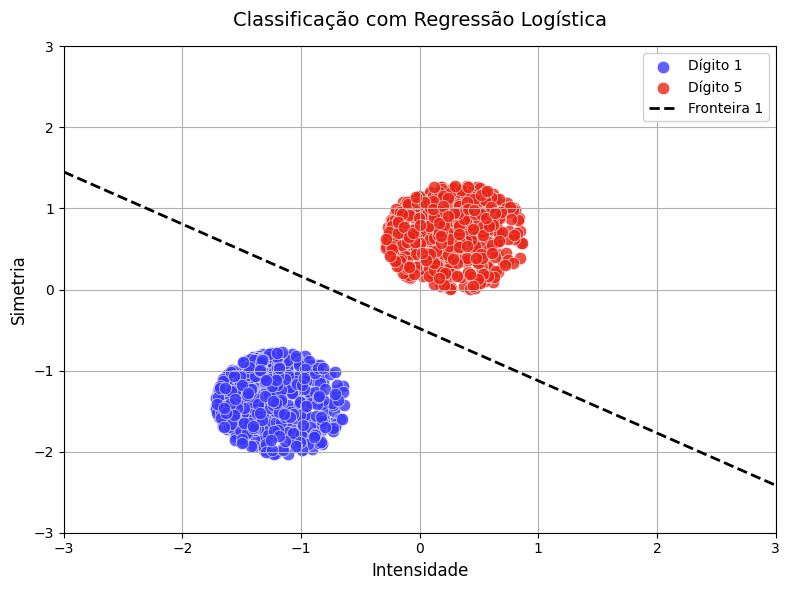

In [435]:
plot_fronteira(X_test, test_1, test_5, logistic_model.w, title='Classificação com Regressão Logística', cor1='k--')

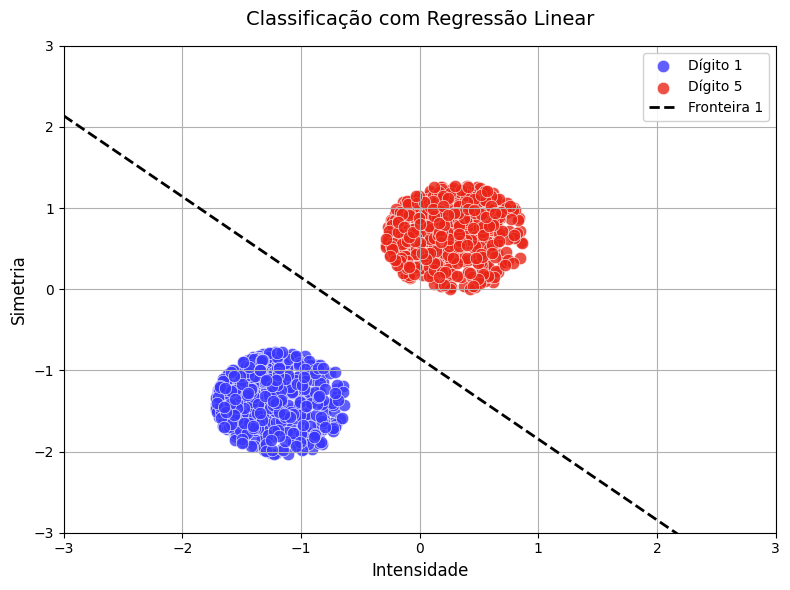

In [436]:
plot_fronteira(X_test, test_1, test_5, regressao_linear.w, title='Classificação com Regressão Linear', cor1='k--')

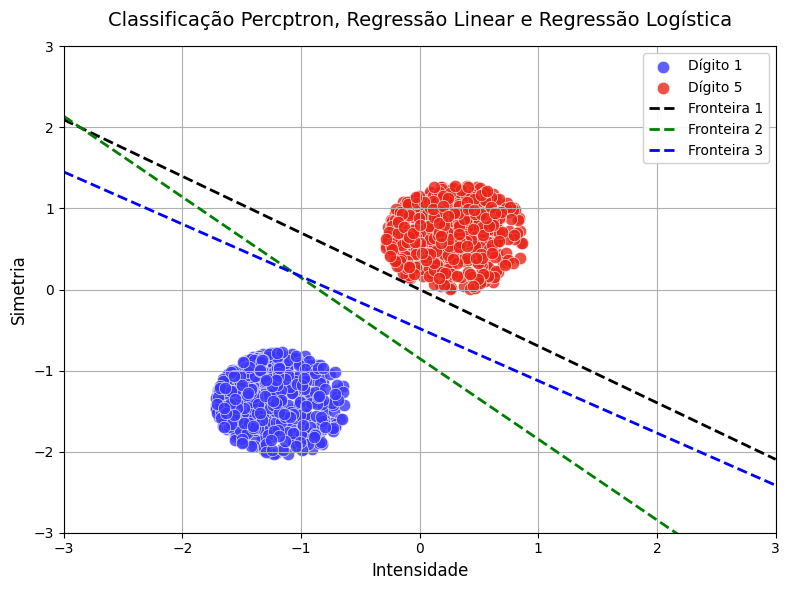

In [437]:
plot_fronteira(X_test, test_1, test_5, perceptron.w, regressao_linear.w, logistic_model.w, title='Classificação Percptron, Regressão Linear e Regressão Logística', cor1='k--', cor2='g--', cor3='b--')

##### Matriz de confusão e relatório de eficácia

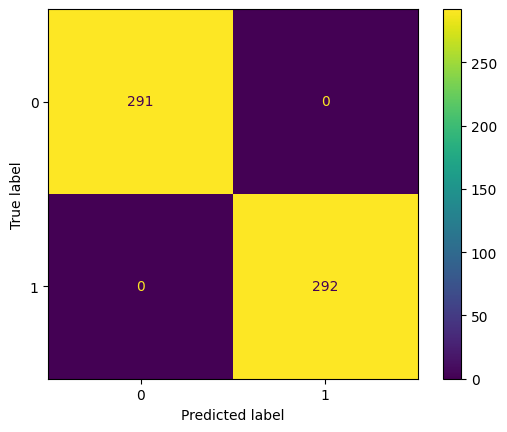

In [302]:
#matriz confusão do perceptron
cm = confusion_matrix(y_test, y_pred_perceptron)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

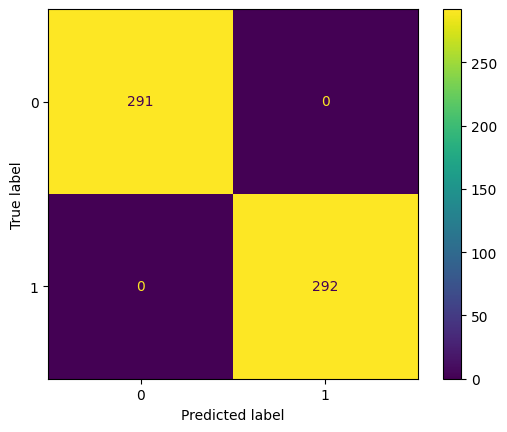

In [303]:
#matriz confusão para regressão linear

cm = confusion_matrix(y_test, y_pred_rl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

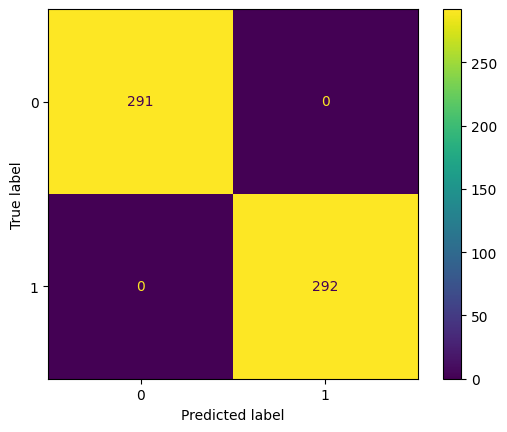

In [304]:
#matriz confusão para regressão logística

cm = confusion_matrix(y_test, y_pred_rlog)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [305]:

#relatório de eficácia perceptron
relatorio = classification_report(y_test, y_pred_perceptron)
print(relatorio)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



In [306]:
#relatório de eficácia regressão linear
relatorio = classification_report(y_test, y_pred_rl)
print(relatorio)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



In [307]:
#relatório de eficácia regressão logística
relatorio = classification_report(y_test, y_pred_rlog)
print(relatorio)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



#### "Um contra todos"

In [308]:
train_0 = df_train_redu[df_train_redu['label'] == 0]
train_1 = df_train_redu[df_train_redu['label'] == 1]
train_4 = df_train_redu[df_train_redu['label'] == 4]
train_5 = df_train_redu[df_train_redu['label'] == 5]

In [309]:
test_0 = df_test_redu[df_test_redu['label'] == 0]
test_1 = df_test_redu[df_test_redu['label'] == 1]
test_4 = df_test_redu[df_test_redu['label'] == 4]
test_5 = df_test_redu[df_test_redu['label'] == 5]

In [312]:
def plot_digitos_0_1_4_5(train_0, train_1, train_4, train_5):
    plt.figure(figsize=(8, 6))

    plt.scatter(train_0['intensidade'], train_0['simetria'],
               c='purple', s=40, edgecolor='white', linewidth=0.4,
               label='Dígito 0', alpha=0.8)
    plt.scatter(train_1['intensidade'], train_1['simetria'],
               c='orange', s=40, edgecolor='white', linewidth=0.4,
               label='Dígito 1', alpha=0.8)
    plt.scatter(train_4['intensidade'], train_4['simetria'],
               c='firebrick', s=40, edgecolor='white', linewidth=0.4,
               label='Dígito 4', alpha=0.8)
    plt.scatter(train_5['intensidade'], train_5['simetria'],
               c='royalblue', s=40, edgecolor='white', linewidth=0.4,
               label='Dígito 5', alpha=0.8)

    plt.xlabel('Intensidade', fontsize=12)
    plt.ylabel('Simetria', fontsize=12)
    plt.title('Dígitos 0,1,4,5 - Intensidade vs. Simetria', pad=15, fontsize=14)
    plt.legend(frameon=True, framealpha=0.9, facecolor='white')
    plt.grid(True, linestyle=':', alpha=0.4)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.tight_layout()
    plt.show()

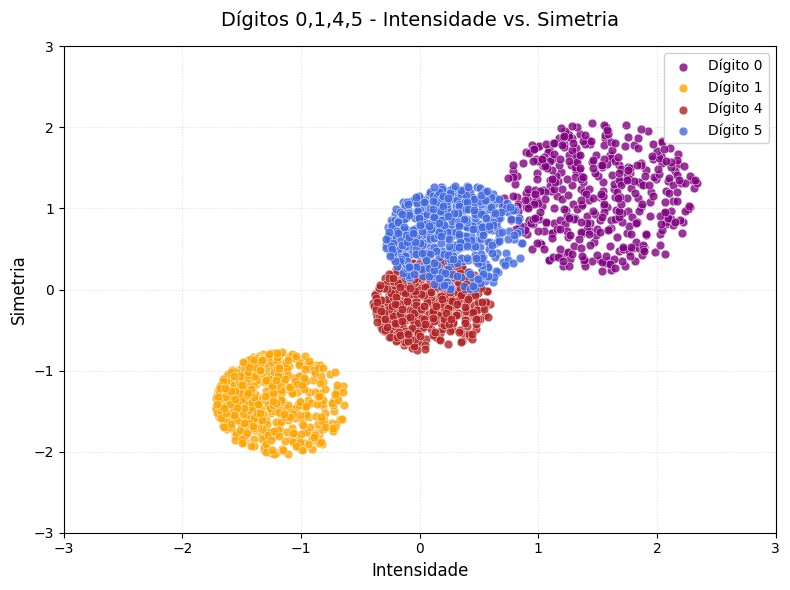

In [313]:
plot_digitos_0_1_4_5(train_0, train_1, train_4, train_5)

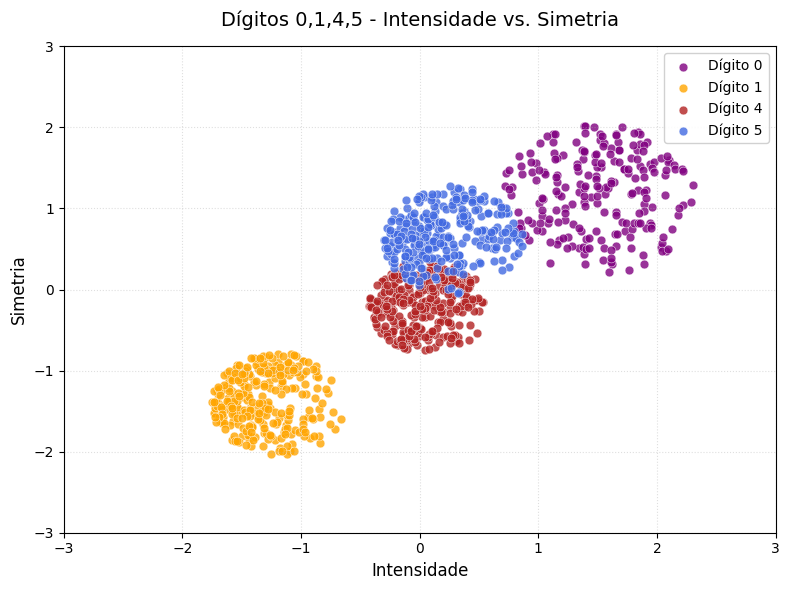

In [314]:
plot_digitos_0_1_4_5(test_0, test_1, test_4, test_5)

In [315]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_train_redu = []

for i in range(len(df_train_redu)):
    intensidade = float(df_train_redu.iloc[i]['intensidade'])
    simetria = float(df_train_redu.iloc[i]['simetria'])
    X_train_redu.append((intensidade, simetria))

# Construção do vetor y onde y = +1 para label = 1 e y = -1 para label = 5
y_train_0 = []

for i in range(len(df_train_redu)):
    if df_train_redu.iloc[i]['label'] == 0:
        y_train_0.append(1)
    else:
        y_train_0.append(-1)



In [316]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_teste_redu = []

for i in range(len(df_test_redu)):
    intensidade = float(df_test_redu.iloc[i]['intensidade'])
    simetria = float(df_test_redu.iloc[i]['simetria'])
    X_teste_redu.append((intensidade, simetria))

# Construção do vetor y onde y = +1 para label = 1 e y = -1 para label = 5
y_teste_0 = []

for i in range(len(df_test_redu)):
    if df_test_redu.iloc[i]['label'] == 0:
        y_teste_0.append(1)
    else:
        y_teste_0.append(-1)

In [317]:
X_no_0 = df_train_redu[df_train_redu['label'] != 0]

In [318]:
X_no_0_teste = df_test_redu[df_test_redu['label'] != 0]

In [322]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_train_redu_1 = []

for i in range(len(X_no_0)):
    intensidade = float(X_no_0.iloc[i]['intensidade'])
    simetria = float(X_no_0.iloc[i]['simetria'])
    X_train_redu_1.append((intensidade, simetria))

y_train_1 = []

for i in range(len(X_no_0)):
    if X_no_0.iloc[i]['label'] == 1:
        y_train_1.append(1)
    else:
        y_train_1.append(-1)



In [320]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_teste_redu_1 = []

for i in range(len(X_no_0_teste)):
    intensidade = float(X_no_0_teste.iloc[i]['intensidade'])
    simetria = float(X_no_0_teste.iloc[i]['simetria'])
    X_teste_redu_1.append((intensidade, simetria))

# Construção do vetor y onde y = +1 para label = 1 e y = -1 para label = 5
y_teste_1 = []

for i in range(len(X_no_0_teste)):
    if X_no_0_teste.iloc[i]['label'] == 1:
        y_teste_1.append(1)
    else:
        y_teste_1.append(-1)

In [323]:
X_no_1 = X_no_0[X_no_0['label'] != 1]

In [324]:
X_no_1_teste = X_no_0_teste[X_no_0_teste['label'] != 1]

In [325]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_train_redu_4 = []

for i in range(len(X_no_1)):
    intensidade = float(X_no_1.iloc[i]['intensidade'])
    simetria = float(X_no_1.iloc[i]['simetria'])
    X_train_redu_4.append((intensidade, simetria))

y_train_4 = []

for i in range(len(X_no_1)):
    if X_no_1.iloc[i]['label'] == 4:
        y_train_4.append(1)
    else:
        y_train_4.append(-1)


In [326]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_teste_redu_4 = []

for i in range(len(X_no_1_teste)):
    intensidade = float(X_no_1_teste.iloc[i]['intensidade'])
    simetria = float(X_no_1_teste.iloc[i]['simetria'])
    X_teste_redu_4.append((intensidade, simetria))

# Construção do vetor y onde y = +1 para label = 1 e y = -1 para label = 5
y_teste_4 = []

for i in range(len(X_no_1_teste)):
    if X_no_1_teste.iloc[i]['label'] == 4:
        y_teste_4.append(1)
    else:
        y_teste_4.append(-1)

##### Perceptron

In [327]:
perceptron0 = Perceptron()
perceptron0.fit(X_train_redu, y_train_0)
wp0 = perceptron0.w

Atenção: atingiu o número máximo de iterações (200000) sem convergir.


In [328]:
perceptron1 = Perceptron()
perceptron1.fit(X_train_redu_1, y_train_1)
wp1 = perceptron1.w

In [329]:
perceptron4 = Perceptron()
perceptron4.fit(X_train_redu_4, y_train_4)
wp4 = perceptron4.w

Atenção: atingiu o número máximo de iterações (200000) sem convergir.


In [330]:
perceptron0_teste = Perceptron()
perceptron0_teste.fit(X_teste_redu, y_teste_0)
wp0_teste = perceptron0_teste.w


Atenção: atingiu o número máximo de iterações (200000) sem convergir.


In [331]:
perceptron1_teste = Perceptron()
perceptron1_teste.fit(X_teste_redu_1, y_teste_1)
wp1_teste = perceptron1_teste.w


In [332]:
perceptron4_teste = Perceptron()
perceptron4_teste.fit(X_teste_redu_4, y_teste_4)
wp4_teste = perceptron4_teste.w

Atenção: atingiu o número máximo de iterações (200000) sem convergir.


##### Regressão Linear

In [333]:
regressao_linear0 = RegressaoLinear()
regressao_linear0.fit(X_train_redu, y_train_0)
w0 = regressao_linear0.w

In [334]:
regressao_linear1 = RegressaoLinear()
regressao_linear1.fit(X_train_redu_1, y_train_1)
w1 = regressao_linear1.w

In [335]:
regressao_linear4 = RegressaoLinear()
regressao_linear4.fit(X_train_redu_4, y_train_4)
w4 = regressao_linear4.w

In [336]:
regressao_linear0_teste = RegressaoLinear()
regressao_linear0_teste.fit(X_teste_redu, y_teste_0)
w0_teste = regressao_linear0_teste.w

In [337]:
regressao_linear1_teste = RegressaoLinear()
regressao_linear1_teste.fit(X_teste_redu_1, y_teste_1)
w1_teste = regressao_linear1_teste.w

In [338]:
regressao_linear4_teste = RegressaoLinear()
regressao_linear4_teste.fit(X_teste_redu_4, y_teste_4)
w4_teste = regressao_linear4_teste.w

##### Regressão Logística

In [339]:
reg_log0 = LogisticRegression(max_iter=5000)
reg_log0.fit(X_train_redu, y_train_0)
bias = reg_log0.intercept_[0]
p2, p3 = reg_log0.coef_[0]       
w_rlog0 = [bias, p2, p3]

In [340]:
reg_log1 = LogisticRegression(max_iter=5000)
reg_log1.fit(X_train_redu_1, y_train_1)
bias = reg_log1.intercept_[0]
p2, p3 = reg_log1.coef_[0]       
w_rlog1 = [bias, p2, p3]

In [341]:
reg_log4 = LogisticRegression(max_iter=5000)
reg_log4.fit(X_train_redu_4, y_train_4)
bias = reg_log4.intercept_[0]
p2, p3 = reg_log4.coef_[0]       
w_rlog4 = [bias, p2, p3]

In [342]:
reg_log0_teste = LogisticRegression(max_iter=5000)
reg_log0_teste.fit(X_teste_redu, y_teste_0)
bias = reg_log0_teste.intercept_[0]
p2, p3 = reg_log0_teste.coef_[0]       
w_rlog0_teste = [bias, p2, p3]

In [343]:
reg_log1_teste = LogisticRegression(max_iter=5000)
reg_log1_teste.fit(X_teste_redu_1, y_teste_1)
bias = reg_log1_teste.intercept_[0]
p2, p3 = reg_log1_teste.coef_[0]       
w_rlog1_teste = [bias, p2, p3]

In [344]:
reg_log4_teste = LogisticRegression(max_iter=5000)
reg_log4_teste.fit(X_teste_redu_4, y_teste_4)
bias = reg_log4_teste.intercept_[0]
p2, p3 = reg_log4_teste.coef_[0]       
w_rlog4_teste = [bias, p2, p3]

In [346]:
def plot_retas(data0, data1, data4, data5, w):

    plt.figure(figsize=(8, 6))

    # Gera valores de intensidade para o eixo x
    xs = np.linspace(-3, 3, 200)

    # Calcula os valores de simetria correspondentes para a fronteira
    def calcula_y(w, xs):
        w0, w1, w2 = w
        return (-w0 - w1 * xs) / w2

    ys = calcula_y(w, xs)

    plt.plot(xs, ys, linewidth=2, label='Fronteira')

    plt.scatter(data0['intensidade'], data0['simetria'], 
            c='purple', s=40, edgecolor='white', linewidth=0.4, 
            label='Dígito 0', alpha=0.8)
    plt.scatter(data1['intensidade'], data1['simetria'], 
            c='orange', s=40, edgecolor='white', linewidth=0.4, 
            label='Dígito 1', alpha=0.8)
    plt.scatter(data4['intensidade'], data4['simetria'], 
            c='firebrick', s=40, edgecolor='white', linewidth=0.4, 
            label='Dígito 4', alpha=0.8)
    plt.scatter(data5['intensidade'], data5['simetria'], 
            c='royalblue', s=40, edgecolor='white', linewidth=0.4, 
            label='Dígito 5', alpha=0.8)

    plt.xlabel('Intensidade', fontsize=12)
    plt.ylabel('Simetria', fontsize=12)
    plt.title('Dígitos 0,1,4 e 5 - Intensidade vs. Simetria', pad=15, fontsize=14)
    plt.legend(frameon=True, framealpha=0.9, facecolor='white')
    plt.grid(True, linestyle=':', alpha=0.4)
    plt.xlim(-3,3) 
    plt.ylim(-3,3)  
    plt.tight_layout()  
    plt.show()

In [347]:
def plot_multiplas_retas(train_0, train_1, train_4, train_5, w0, w1, w4):
    """
    Plota as fronteiras de decisão para três classificadores lineares e os dados dos dígitos 0, 1, 4 e 5.
    """
    plt.figure(figsize=(8, 6))

    xs = np.linspace(-3, 3, 200)

    def calcula_y(w, xs):
        w0, w1, w2 = w
        return (-w0 - w1 * xs) / w2

    ys0 = calcula_y(w0, xs)
    ys1 = calcula_y(w1, xs)
    ys4 = calcula_y(w4, xs)

    plt.plot(xs, ys0, linewidth=2, label='Fronteira 0')
    plt.plot(xs, ys1, linewidth=2, label='Fronteira 1')
    plt.plot(xs, ys4, linewidth=2, label='Fronteira 4')

    plt.scatter(train_0['intensidade'], train_0['simetria'],
               c='purple', s=40, edgecolor='white', linewidth=0.4,
               label='Dígito 0', alpha=0.8)
    plt.scatter(train_1['intensidade'], train_1['simetria'],
               c='orange', s=40, edgecolor='white', linewidth=0.4,
               label='Dígito 1', alpha=0.8)
    plt.scatter(train_4['intensidade'], train_4['simetria'],
               c='firebrick', s=40, edgecolor='white', linewidth=0.4,
               label='Dígito 4', alpha=0.8)
    plt.scatter(train_5['intensidade'], train_5['simetria'],
               c='royalblue', s=40, edgecolor='white', linewidth=0.4,
               label='Dígito 5', alpha=0.8)

    plt.xlabel('Intensidade', fontsize=12)
    plt.ylabel('Simetria', fontsize=12)
    plt.title('Dígitos 0,1,4 e 5 - Intensidade vs. Simetria', pad=15, fontsize=14)
    plt.legend(frameon=True, framealpha=0.9, facecolor='white')
    plt.grid(True, linestyle=':', alpha=0.4)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.tight_layout()
    plt.show()

##### Perceptron

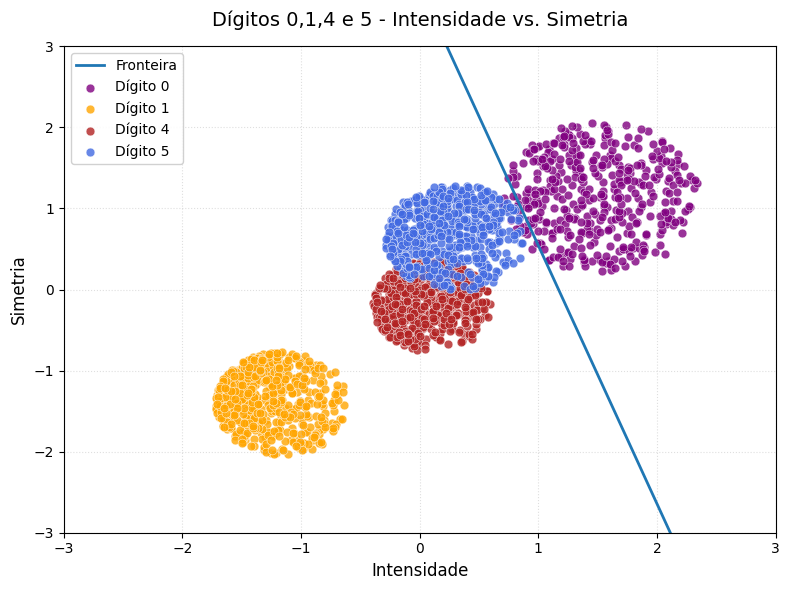

In [348]:
#reta que separa o zero - Perceptron
plot_retas(train_0, train_1, train_4, train_5, wp0)

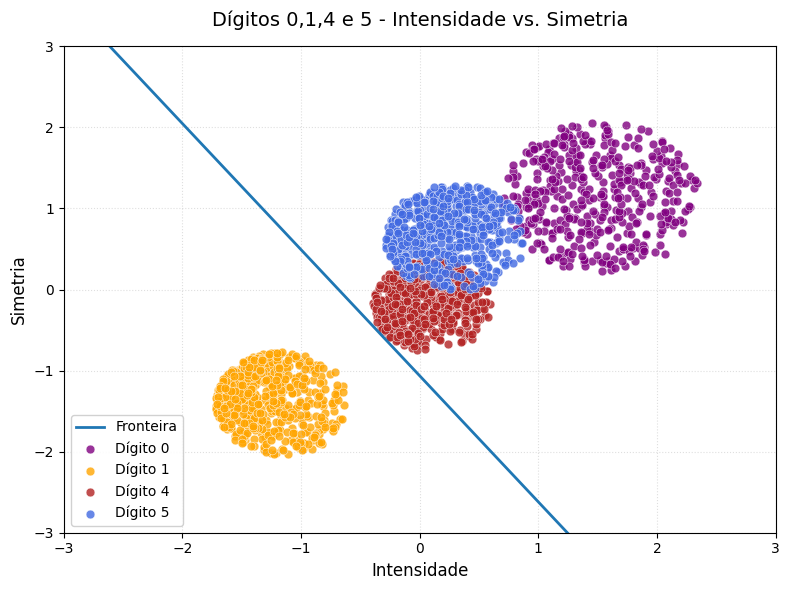

In [349]:
#reta que separa o 1 - Perceptron
plot_retas(train_0, train_1, train_4, train_5, wp1)

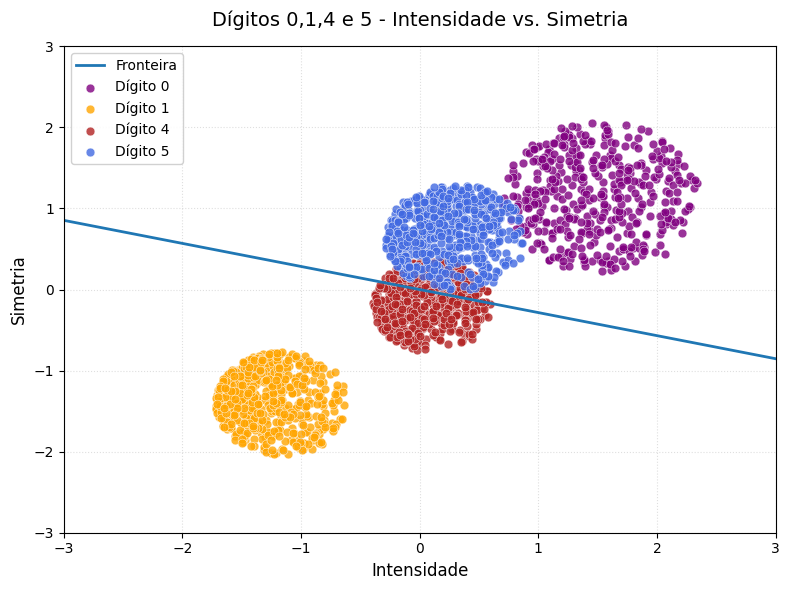

In [350]:
#reta que separa o 4 - Perceptron
plot_retas(train_0, train_1, train_4, train_5, wp4)

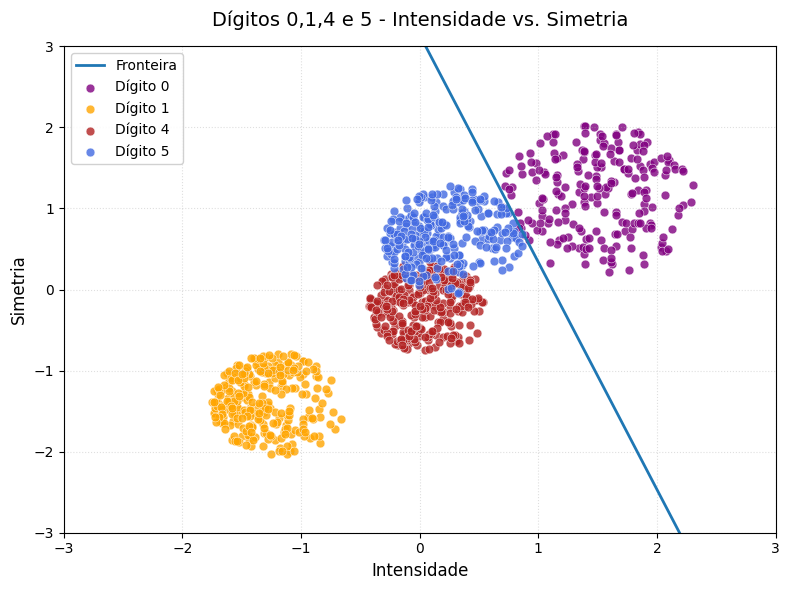

In [351]:
#reta que separa o 0 - Perceptron - teste
plot_retas(test_0, test_1, test_4, test_5, wp0_teste)

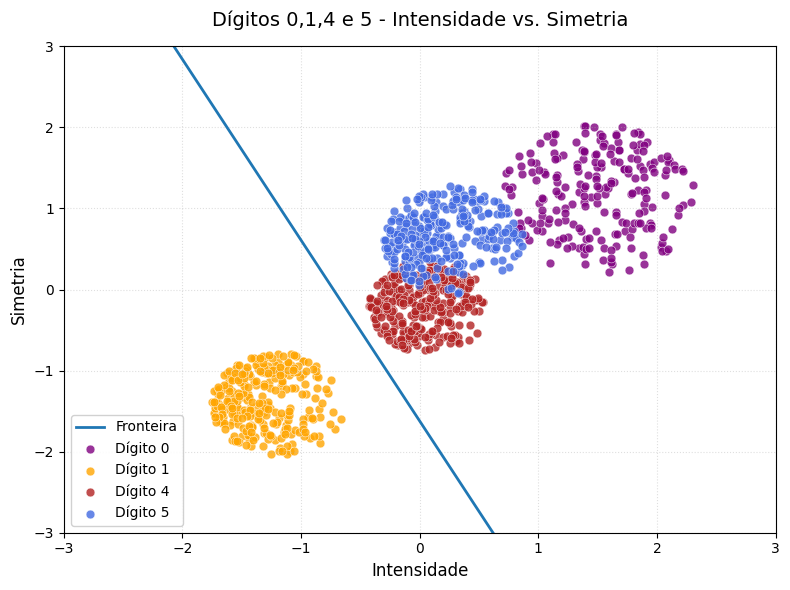

In [352]:
#reta que separa o 1 - Perceptron - teste
plot_retas(test_0, test_1, test_4, test_5, wp1_teste)

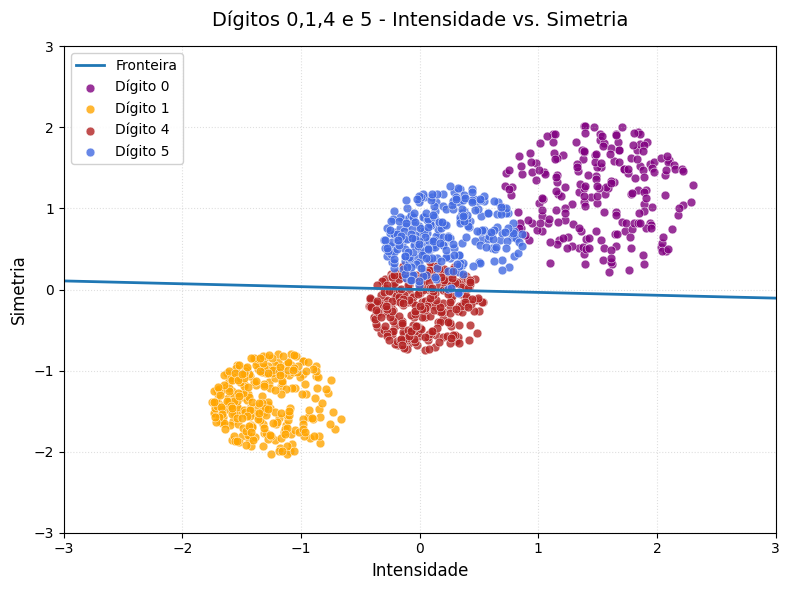

In [353]:
#reta que separa o 4 - Perceptron - teste
plot_retas(test_0, test_1, test_4, test_5, wp4_teste)

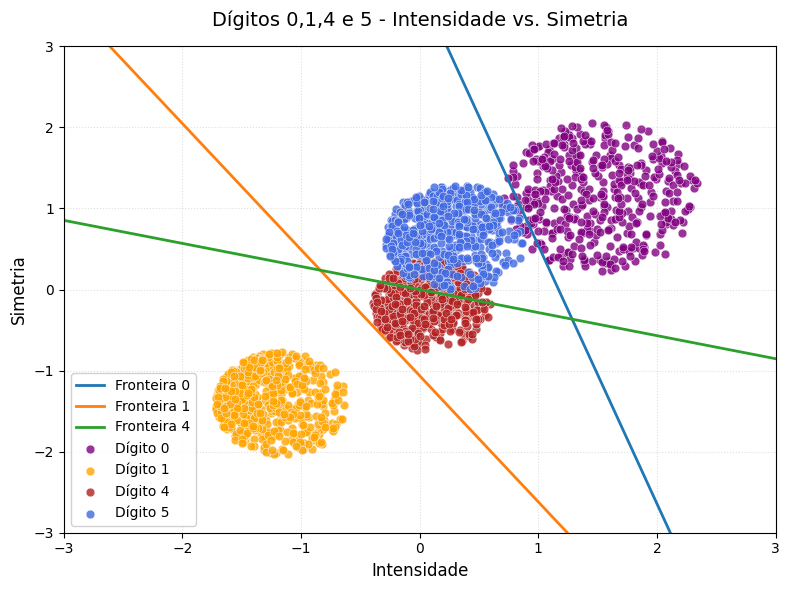

In [354]:
#3 retas - Perceptron
plot_multiplas_retas(train_0, train_1, train_4, train_5, wp0, wp1, wp4)

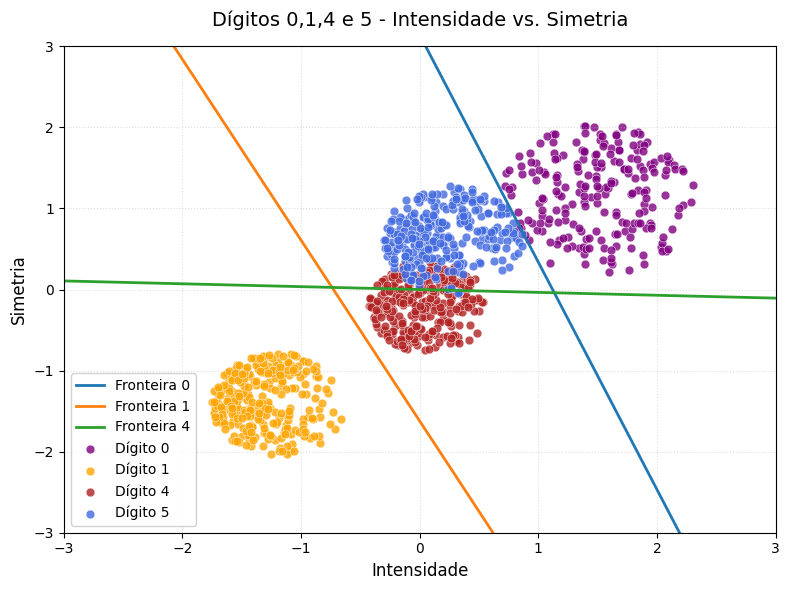

In [355]:
#3 retas - Perceptron - teste
plot_multiplas_retas(test_0, test_1, test_4, test_5, wp0_teste, wp1_teste, wp4_teste)

##### Regressão Linear

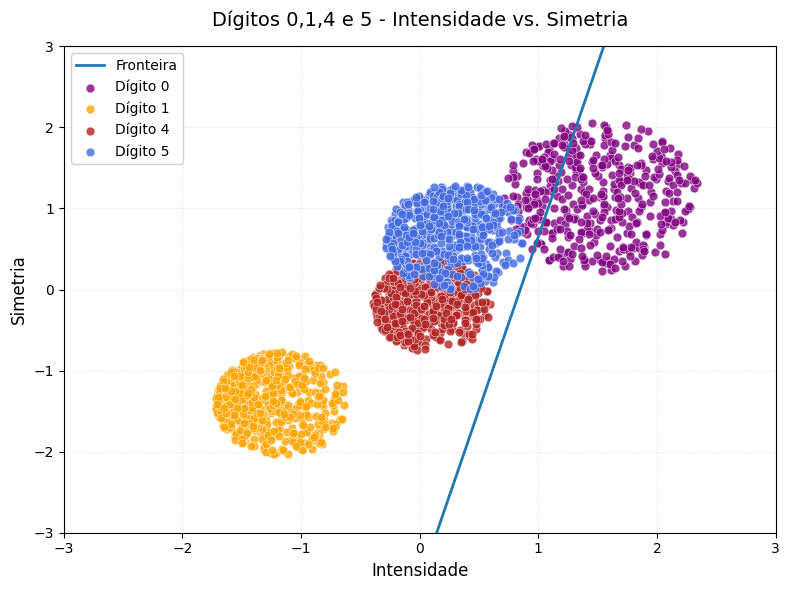

In [356]:
#reta que separa o zero - regressão linear
plot_retas(train_0, train_1, train_4, train_5, w0)

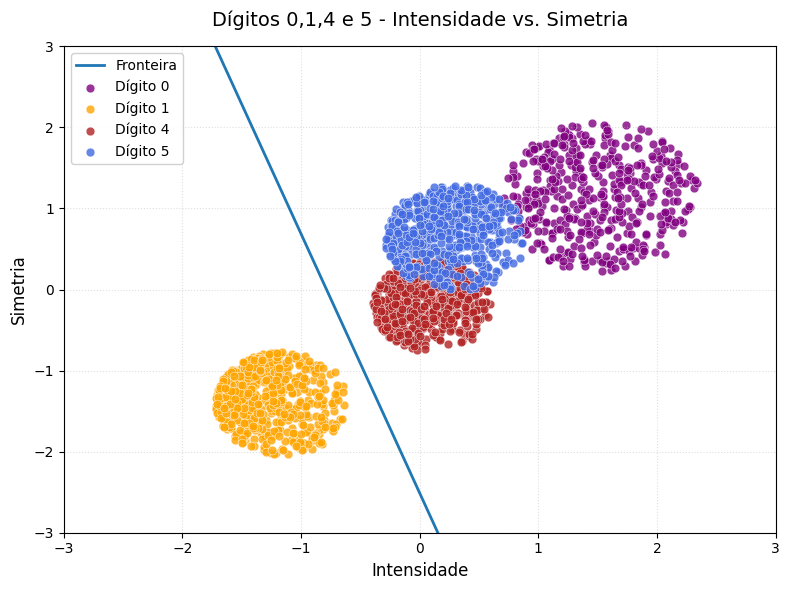

In [357]:
#reta que separa o 1 - regressão linear
plot_retas(train_0, train_1, train_4, train_5, w1)

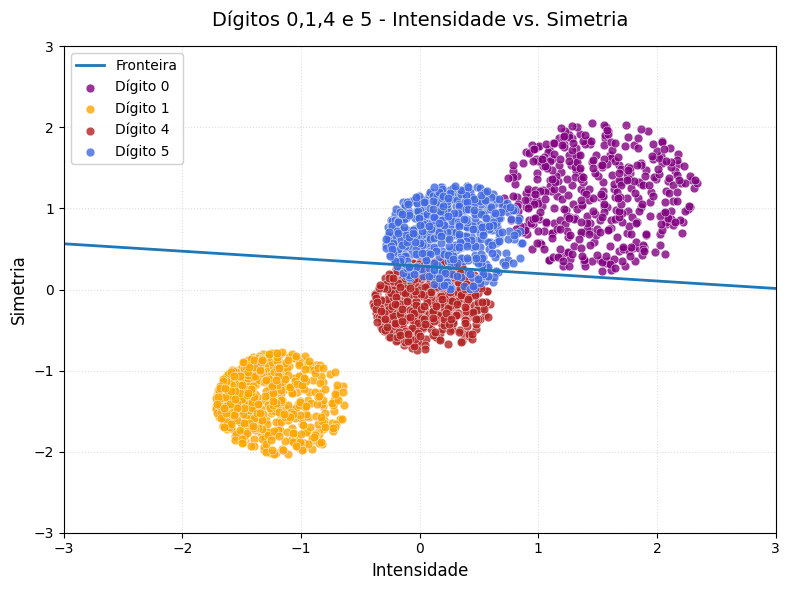

In [358]:
#reta que separa o 4 - regressão linear
plot_retas(train_0, train_1, train_4, train_5, w4)

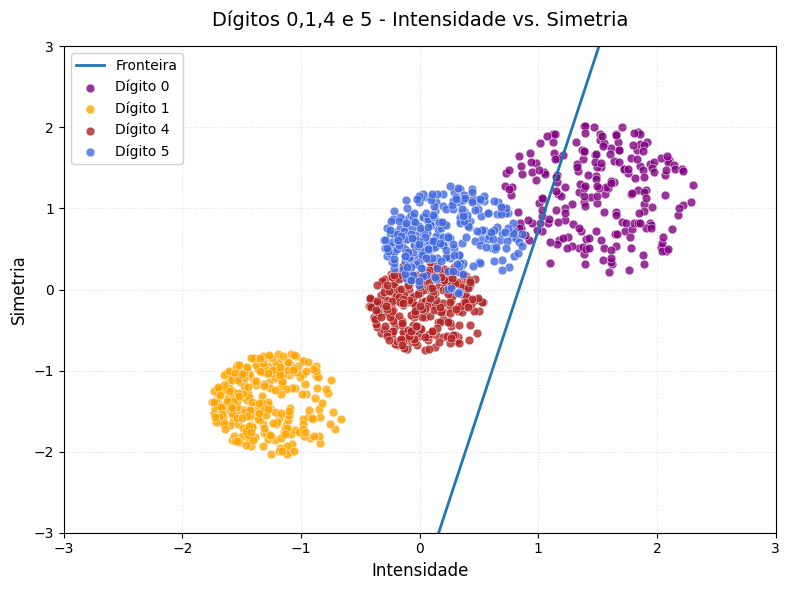

In [359]:
#reta que separa o zero - regressão linear - teste
plot_retas(test_0, test_1, test_4, test_5, w0_teste)

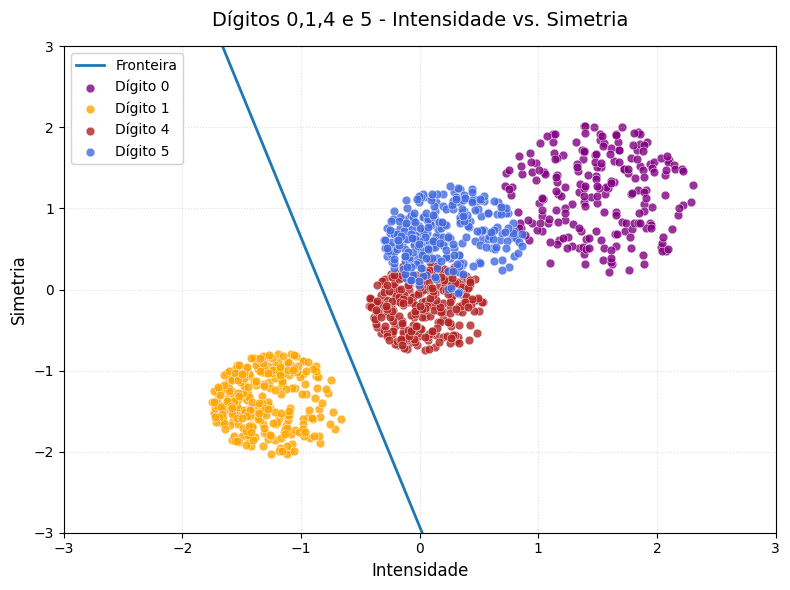

In [360]:
#reta que separa o 1 - regressão linear - teste
plot_retas(test_0, test_1, test_4, test_5, w1_teste)

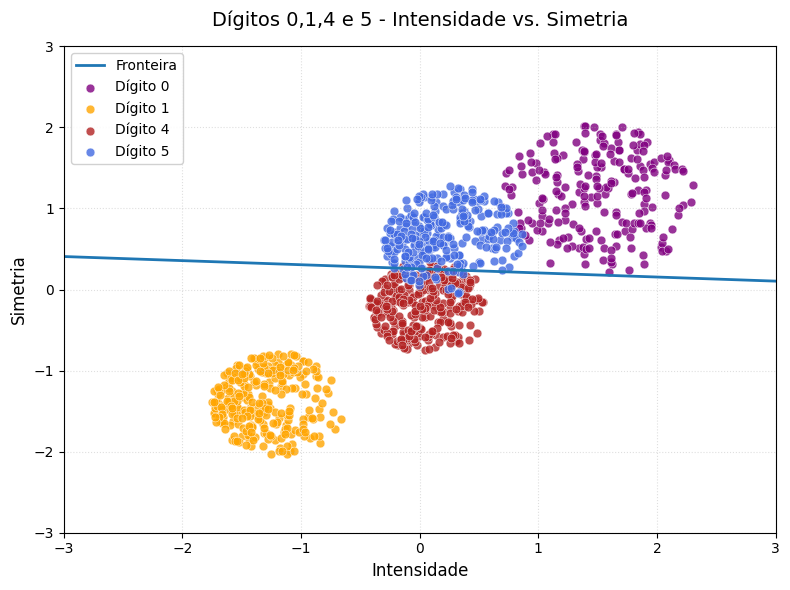

In [361]:
#reta que separa o 4 - regressão linear - teste
plot_retas(test_0, test_1, test_4, test_5, w4_teste)

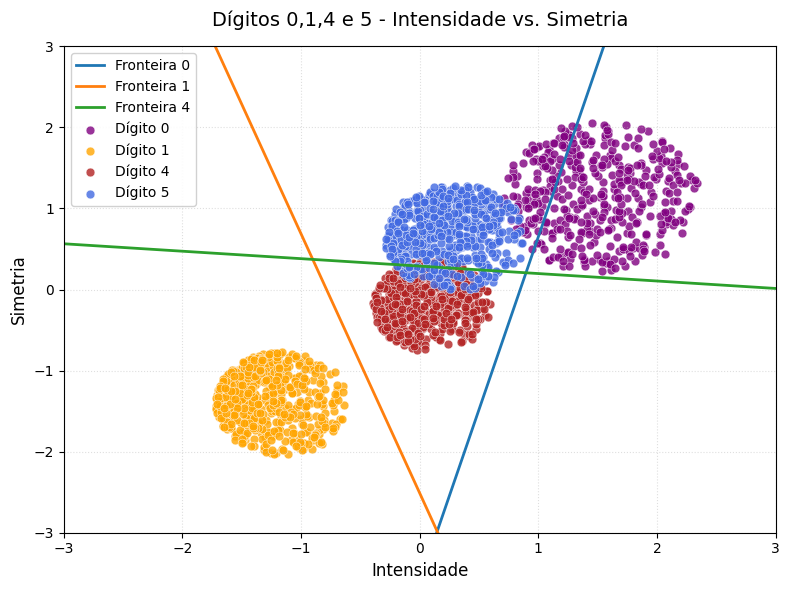

In [362]:
#3 retas - regressão linear 
plot_multiplas_retas(train_0, train_1, train_4, train_5, w0, w1, w4)    

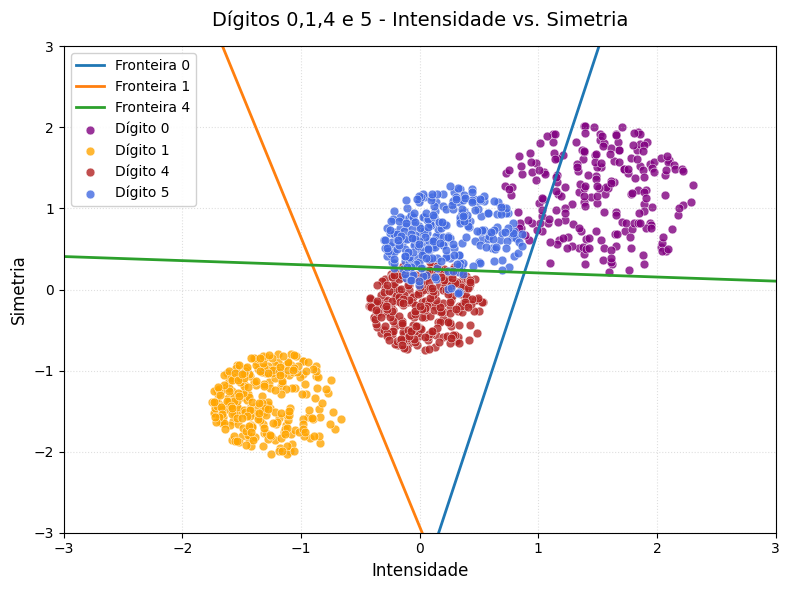

In [363]:
#3 retas - regressão linear - teste
plot_multiplas_retas(test_0, test_1, test_4, test_5, w0_teste, w1_teste, w4_teste)

##### Regressão Logística

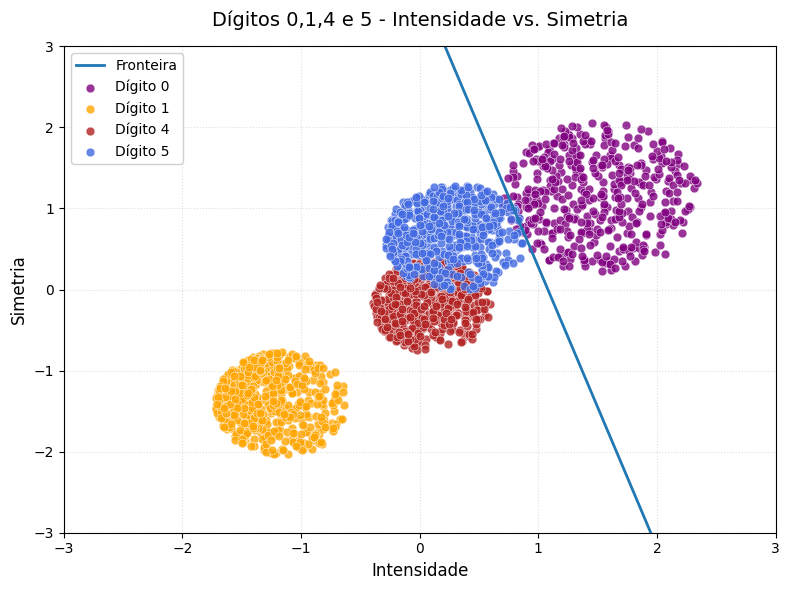

In [364]:
#reta que separa o 0 - regressão logística
plot_retas(train_0, train_1, train_4, train_5, w_rlog0)

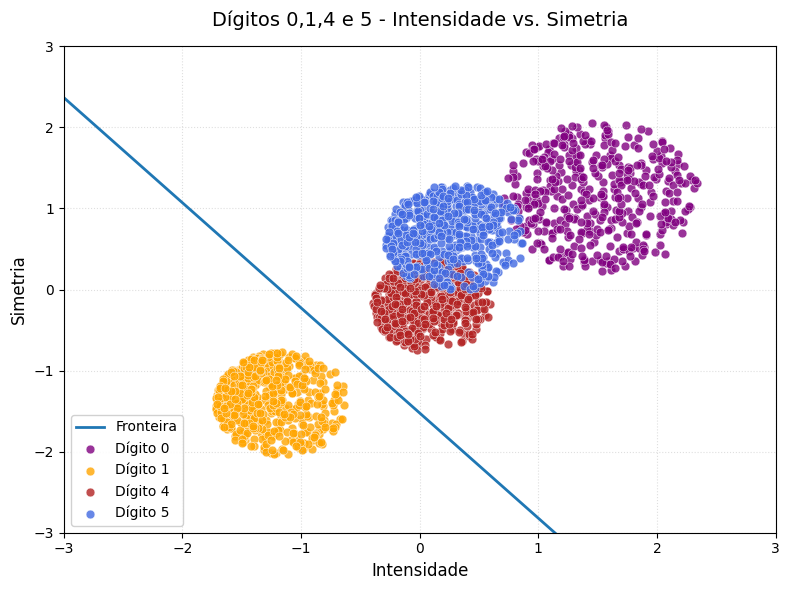

In [365]:
#reta que separa o 1 - regressão logística
plot_retas(train_0, train_1, train_4, train_5, w_rlog1)

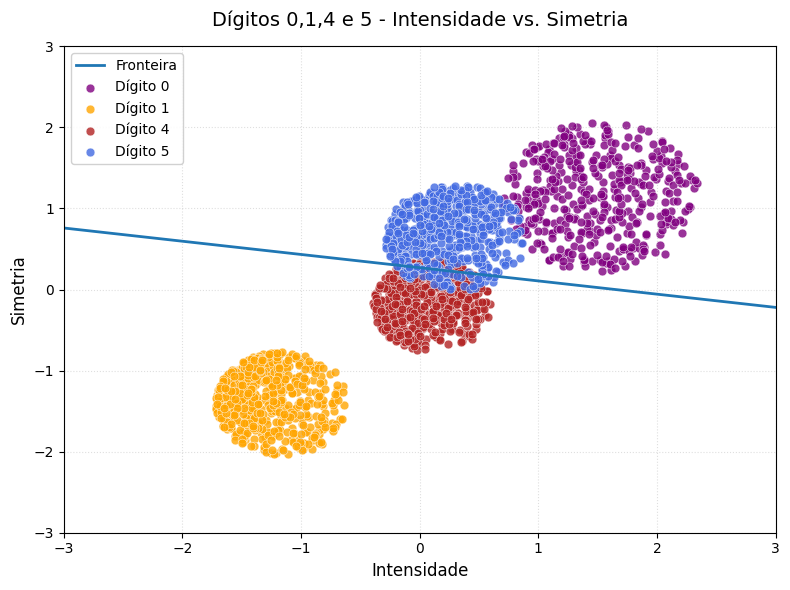

In [366]:
#reta que separa o 4 - regressão logística
plot_retas(train_0, train_1, train_4, train_5, w_rlog4)

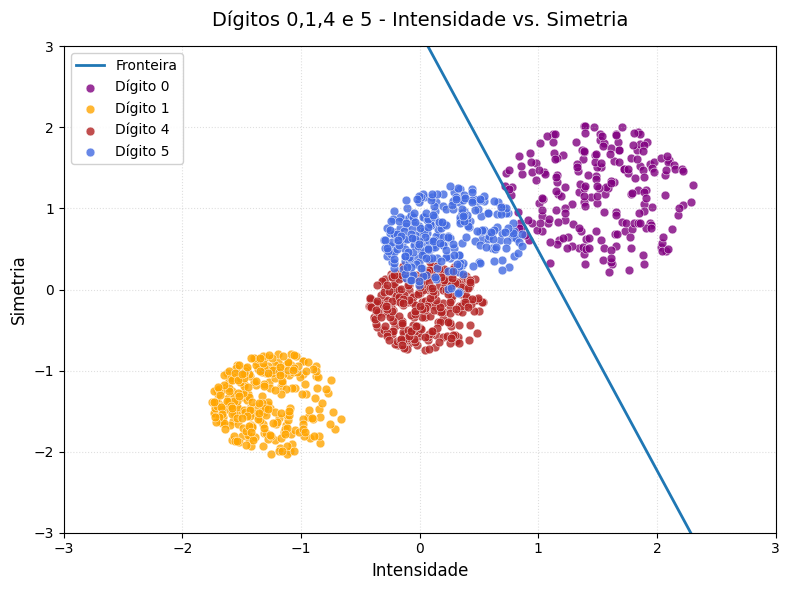

In [367]:
#reta que separa o 0 - regressão logística - teste
plot_retas(test_0, test_1, test_4, test_5, w_rlog0_teste)

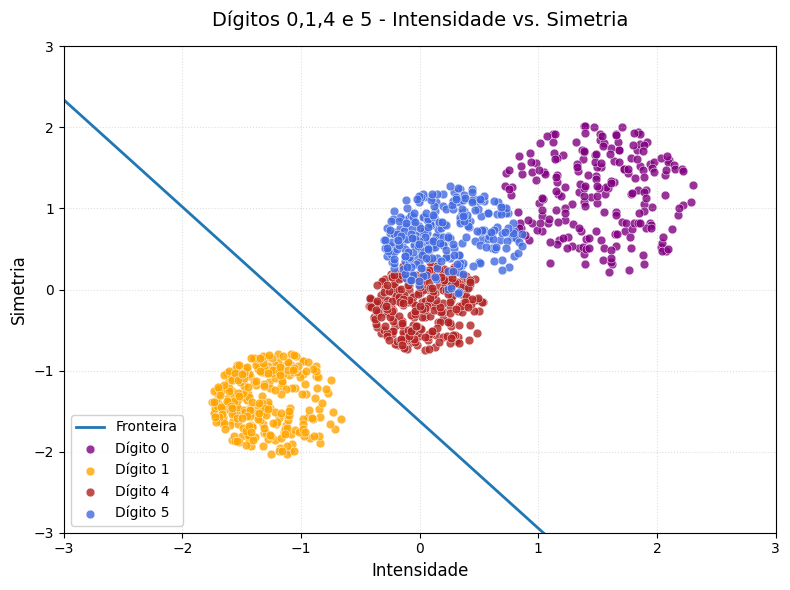

In [368]:
#reta que separa o 1 - regressão logística - teste
plot_retas(test_0, test_1, test_4, test_5, w_rlog1_teste)


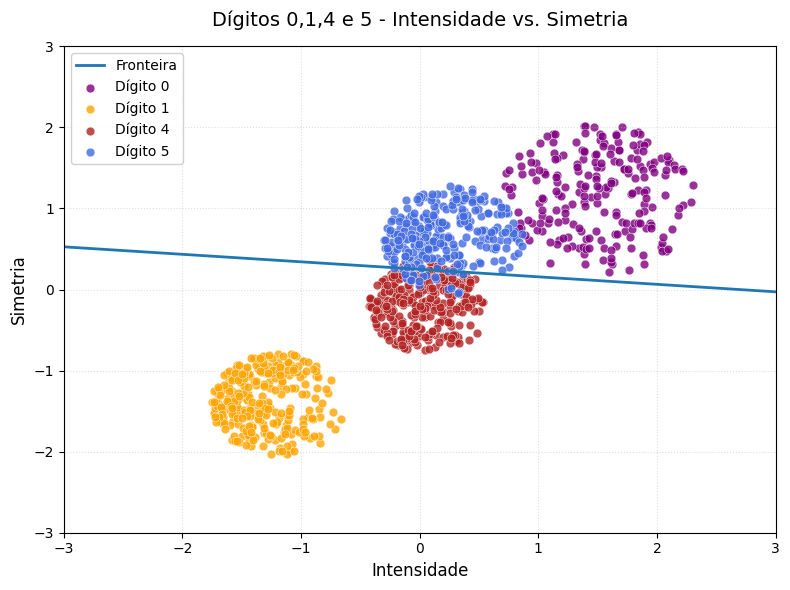

In [369]:
#reta que separa o 4 - regressão logística - teste
plot_retas(test_0, test_1, test_4, test_5, w_rlog4_teste)

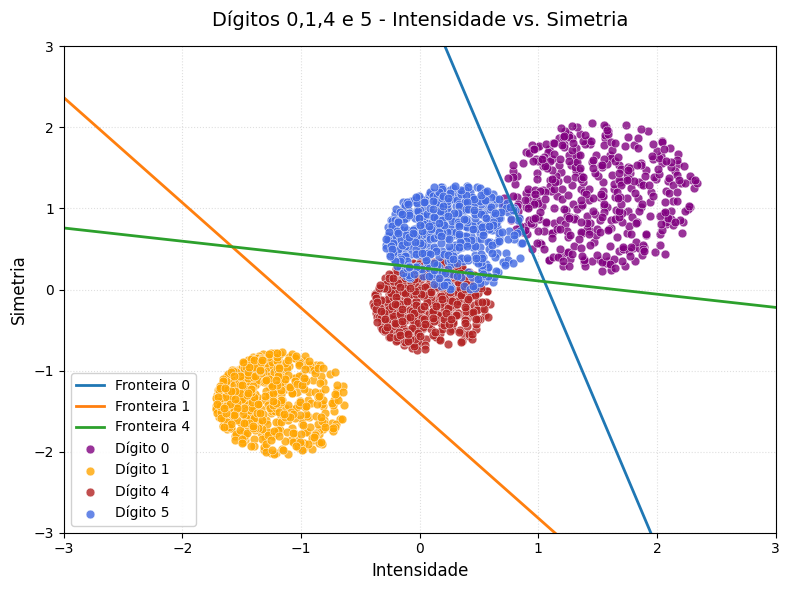

In [370]:
#3 retas - regressão logística
plot_multiplas_retas(train_0, train_1, train_4, train_5, w_rlog0, w_rlog1, w_rlog4)

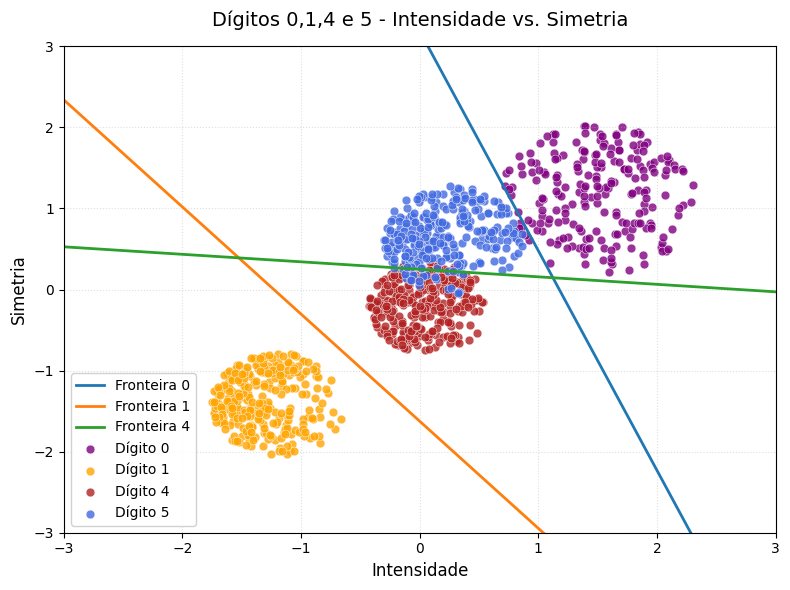

In [371]:
#3 retas - regressão logística - teste
plot_multiplas_retas(test_0, test_1, test_4, test_5, w_rlog0_teste, w_rlog1_teste, w_rlog4_teste)

In [410]:
# Testando no conjunto de teste 1xTodos - 0
y_pred_perceptron_1t_0 = perceptron.predict(X_teste_redu)
y_pred_rl_1t_0 = regressao_linear.predict(X_teste_redu)
y_pred_rlog_1t_0 = logistic_model.predict(X_teste_redu)

In [411]:
# Testando no conjunto de teste 1xTodos - 1
y_pred_perceptron_1t_1 = perceptron.predict(X_teste_redu_1)
y_pred_rl_1t_1 = regressao_linear.predict(X_teste_redu_1)
y_pred_rlog_1t_1 = logistic_model.predict(X_teste_redu_1)

In [412]:
# Testando no conjunto de teste 1xTodos - 4
y_pred_perceptron_1t_4 = perceptron.predict(X_teste_redu_4)
y_pred_rl_1t_4 = regressao_linear.predict(X_teste_redu_4)
y_pred_rlog_1t_4 = logistic_model.predict(X_teste_redu_4)

##### Classifcador de imagens

In [446]:
def classifica(x, f0, f1, f4):
    """
    Classifica um ponto x com base em três classificadores um-contra-todos.
    
    Retorna:
    - 0 se f0 predizer +1
    - 1 se f1 predizer +1
    - 4 se f4 predizer +1
    - 5 caso contrário
    """
    x = np.array(x).reshape(1, -1)

    if f0.predict(x) == 1:
        return 0
    elif f1.predict(x) == 1:
        return 1
    elif f4.predict(x) == 1:
        return 4
    else:
        return 5

    

In [ ]:
y_treino_full = df_train_redu['label'].values
y_teste_full = df_test_redu['label'].values

[0 0 0 ... 5 5 5]
[0 0 0 ... 5 5 5]


##### Relatório de eficácia e Matriz de confusão - Perceptron

In [447]:
y_pred_perceptron_final = [classifica(x, perceptron0_teste, perceptron1_teste, perceptron4_teste) for x in X_teste_redu]
relatorio = classification_report(y_teste_full, y_pred_perceptron_final)
print(relatorio)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       1.00      1.00      1.00       292
           4       0.99      0.71      0.82       314
           5       0.75      0.99      0.85       291

    accuracy                           0.91      1115
   macro avg       0.93      0.92      0.92      1115
weighted avg       0.93      0.91      0.91      1115



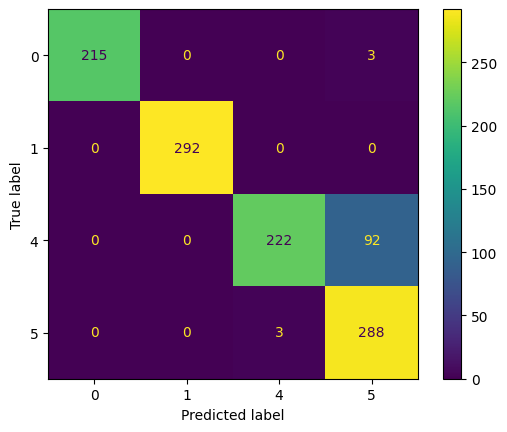

In [439]:
cm = confusion_matrix(y_teste_full, y_pred_perceptron_final, labels=[0,1,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '4', '5'])
disp.plot()

##### Relatório de eficácia e matriz de confusão - Regresão linear

In [440]:
y_pred_rl_final = [classifica(x, regressao_linear0_teste, regressao_linear1_teste, regressao_linear4_teste) for x in X_teste_redu]
relatorio = classification_report(y_teste_full, y_pred_rl_final)
print(relatorio)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90       218
           1       1.00      1.00      1.00       292
           4       0.93      0.97      0.95       314
           5       0.84      0.92      0.88       291

    accuracy                           0.93      1115
   macro avg       0.94      0.93      0.93      1115
weighted avg       0.94      0.93      0.93      1115



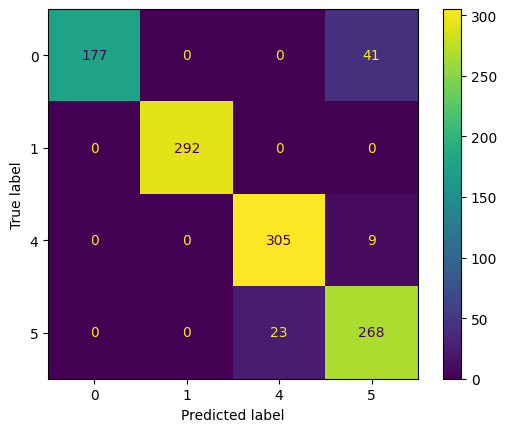

In [441]:
cm = confusion_matrix(y_teste_full, y_pred_rl_final, labels=[0,1,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '4', '5'])
disp.plot()

##### Relatório de eficácia e matriz de confusão - Regressão logística

In [442]:
y_pred_rlog_final = [classifica(x, reg_log0_teste, reg_log1_teste, reg_log4_teste) for x in X_teste_redu]
relatorio = classification_report(y_teste_full, y_pred_rlog_final)
print(relatorio)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       218
           1       1.00      1.00      1.00       292
           4       0.94      0.97      0.95       314
           5       0.94      0.93      0.94       291

    accuracy                           0.97      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.97      0.97      0.97      1115



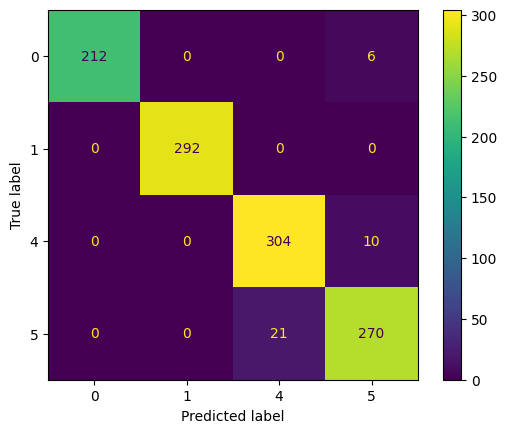

In [443]:
cm = confusion_matrix(y_teste_full, y_pred_rlog_final, labels=[0,1,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '4', '5'])
disp.plot()